In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plta
import seaborn as sns
import xgboost as xgb

In [ ]:

# Load and preprocess dataset
data = pd.read_excel('p3.xlsx')


In [ ]:
data.head()

,Timestamp,Total Consumption (kWh),Machine 1 (kWh),Machine 2 (kWh),HVAC (kWh),Lighting (kWh),Other (kWh),Hour
0,2025-05-17 00:00:00,15.2,5.1,4.8,3.0,1.5,0.8,0
1,2025-05-17 01:00:00,14.9,5.0,4.7,3.0,1.4,0.8,1
2,2025-05-17 02:00:00,14.5,4.9,4.6,2.9,1.3,0.8,2
3,2025-05-17 03:00:00,14.2,4.8,4.5,2.8,1.3,0.8,3
4,2025-05-17 04:00:00,13.9,4.7,4.4,2.8,1.2,0.8,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                72 non-null     datetime64[ns]
 1   Total Consumption (kWh)  72 non-null     float64       
 2   Machine 1 (kWh)          72 non-null     float64       
 3   Machine 2 (kWh)          72 non-null     float64       
 4   HVAC (kWh)               72 non-null     float64       
 5   Lighting (kWh)           72 non-null     float64       
 6   Other (kWh)              72 non-null     float64       
 7   Hour                     72 non-null     int32         
dtypes: datetime64[ns](1), float64(6), int32(1)
memory usage: 4.3 KB


In [ ]:

# Handle missing values
data.fillna(method='ffill', inplace=True)

<ipython-input-5-4ffc19450609>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
data.isnull().sum()

,0
Timestamp,0
Total Consumption (kWh),0
Machine 1 (kWh),0
Machine 2 (kWh),0
HVAC (kWh),0
Lighting (kWh),0
Other (kWh),0
Hour,0


In [ ]:

# Handle missing values
data.fillna(method='ffill', inplace=True)

<ipython-input-6-4ffc19450609>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:

# Convert Timestamp
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
# Total consumption
data['Total Consumption (kWh)'] = data[['Machine 1 (kWh)', 'Machine 2 (kWh)', 'HVAC (kWh)', 'Lighting (kWh)', 'Other (kWh)']].sum(axis=1)


In [ ]:
# Features & target
features = ['Machine 1 (kWh)', 'Machine 2 (kWh)', 'HVAC (kWh)', 'Lighting (kWh)', 'Hour']
target = 'Total Consumption (kWh)'

X = data[features]
y = data[target]


In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# ------------------- Linear Regression -------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
# ------------------- Random Forest -------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:

# ------------------- Gradient Boosting -------------------
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

In [ ]:

# ------------------- XGBoost -------------------
xgbr = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)


In [ ]:
# ------------------- Evaluation -------------------
def evaluate(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> MSE: {mse:.2f}, R²: {r2:.4f}")
    return {'Model': model_name, 'MSE': mse, 'R2': r2}

results = []
results.append(evaluate("Linear Regression", y_test, y_pred_lr))
results.append(evaluate("Random Forest", y_test, y_pred_rf))
results.append(evaluate("Gradient Boosting", y_test, y_pred_gbr))
results.append(evaluate("XGBoost", y_test, y_pred_xgb))

Linear Regression -> MSE: 0.00, R²: 1.0000
Random Forest -> MSE: 0.04, R²: 0.9994
Gradient Boosting -> MSE: 0.02, R²: 0.9996
XGBoost -> MSE: 0.67, R²: 0.9898


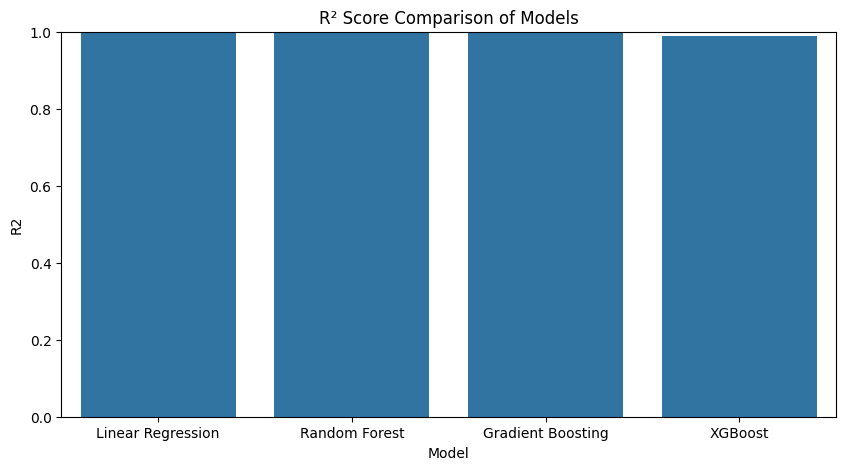

In [ ]:
# ------------------- Accuracy Comparison Plot -------------------
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('R² Score Comparison of Models')
plt.ylim(0, 1)
plt.savefig("model_accuracy_comparison.png")
plt.show()